In [1]:
import numpy as np
import pandas as pd
import os
from weather_predictor import WeatherPredictor
import matplotlib 
% matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
path = 'PV_data'

## Load data

In [3]:
# load data
all_data = pd.read_csv(os.path.join(path, 'data_hourly.csv'))
all_data['date'] = pd.to_datetime(all_data.date)
all_data.set_index('date', inplace = True)

In [4]:
train_end = pd.to_datetime('20170731')
predict_start = pd.to_datetime('20170814-00')
predict_end = pd.to_datetime('20170821-23')

In [5]:
all_data

,hour,DHI,GHI,precipitation,sunshine_dur,temp,apparent_zenith,azimuth,DNI,irradiance,power_output,PV_noise,power_output_noisy
date,,,,,,,,,,,,,
2016-01-01,0,1.000000,2.000000,0.0,0.0,3.916667,152.951337,29.192474,0.000000,1.041040,5.465458,0.406382,5.059076
2016-01-01,1,1.000000,2.000000,0.3,0.0,3.966667,146.269650,53.361376,0.000000,1.072969,5.633085,0.561472,5.071613
2016-01-01,2,1.000000,2.000000,0.0,0.0,3.850000,137.350008,70.597616,0.000000,1.100424,5.777224,0.332850,5.444374
2016-01-01,3,1.000000,2.000000,0.0,0.0,3.683333,127.499366,83.793372,0.000000,1.091607,5.730938,0.423924,5.307014
2016-01-01,4,1.166667,2.500000,0.0,0.0,3.533333,117.394984,94.980482,0.000000,1.216163,6.384854,0.445140,5.939714
2016-01-01,5,1.166667,2.333333,0.0,0.0,2.983333,107.445302,105.348875,0.000000,1.151621,6.046013,0.339696,5.706316
2016-01-01,6,1.166667,2.666667,0.0,0.0,1.683333,97.974301,115.649507,0.000000,1.156989,6.074191,0.791771,5.282420
2016-01-01,7,6.166667,7.666667,0.0,0.0,1.633333,89.103850,126.415593,47.088414,20.676908,108.553765,5.108833,103.444932
2016-01-01,8,32.333333,33.500000,0.0,0.0,1.600000,81.703985,138.040121,8.781663,35.415947,185.933720,17.448305,168.485415


## Select the data to train and to estimate

In [6]:
historical_weather = all_data[:train_end]
predicted_weather = all_data[predict_start:predict_end]

In [7]:
target_columns  = 'power_output_noisy'
feature_columns = ['sunshine_dur', 'precipitation', 'GHI', 'temp', 'apparent_zenith', 'azimuth']

## Declare and fit the weather predictor

In [8]:
mypred = WeatherPredictor(n_estimators = 1000, 
                                     max_features = 0.5)

In [9]:
mypred.fit_model(historical_weather, feature_columns, target_columns)

/Applications/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


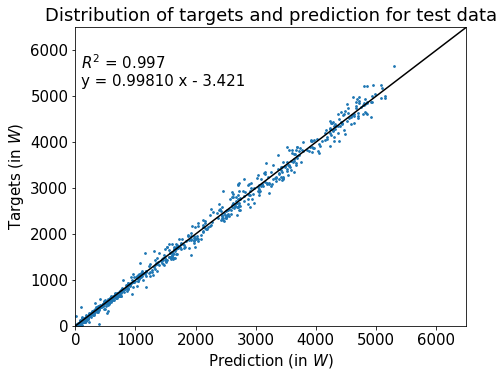

0.003799662402314014

In [10]:
mypred.evaluate_estimator()

## Use LIVE: predict weather variables

In [11]:
# new_data

In [12]:
pred = mypred.predict(predicted_weather, feature_columns) # this comes from the weather station!

In [13]:
predicted_weather['power_prediction'] = pred
timestamps = pd.to_datetime(predicted_weather.index) + pd.to_timedelta(predicted_weather.hour, unit = 'h')

/Applications/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## save predictions and real production to csv

In [14]:
predicted_weather.power_prediction.to_csv(os.path.join(path, 'PV_prediction.csv'))

In [15]:
raw_data = pd.read_csv(os.path.join(path, 'data_out.csv'))
raw_data['time'] = pd.to_datetime(raw_data.time)
raw_data.set_index('time', inplace = True)

ten_min_data = raw_data[predict_start:predict_end].power_output_noisy
ten_min_data.to_csv(os.path.join(path, 'PV_output.csv'))

In [16]:
predicted_weather.power_output_noisy.to_csv(os.path.join(path, 'PV_data_hourly.csv'))

## Plot results

<IPython.core.display.Javascript object>


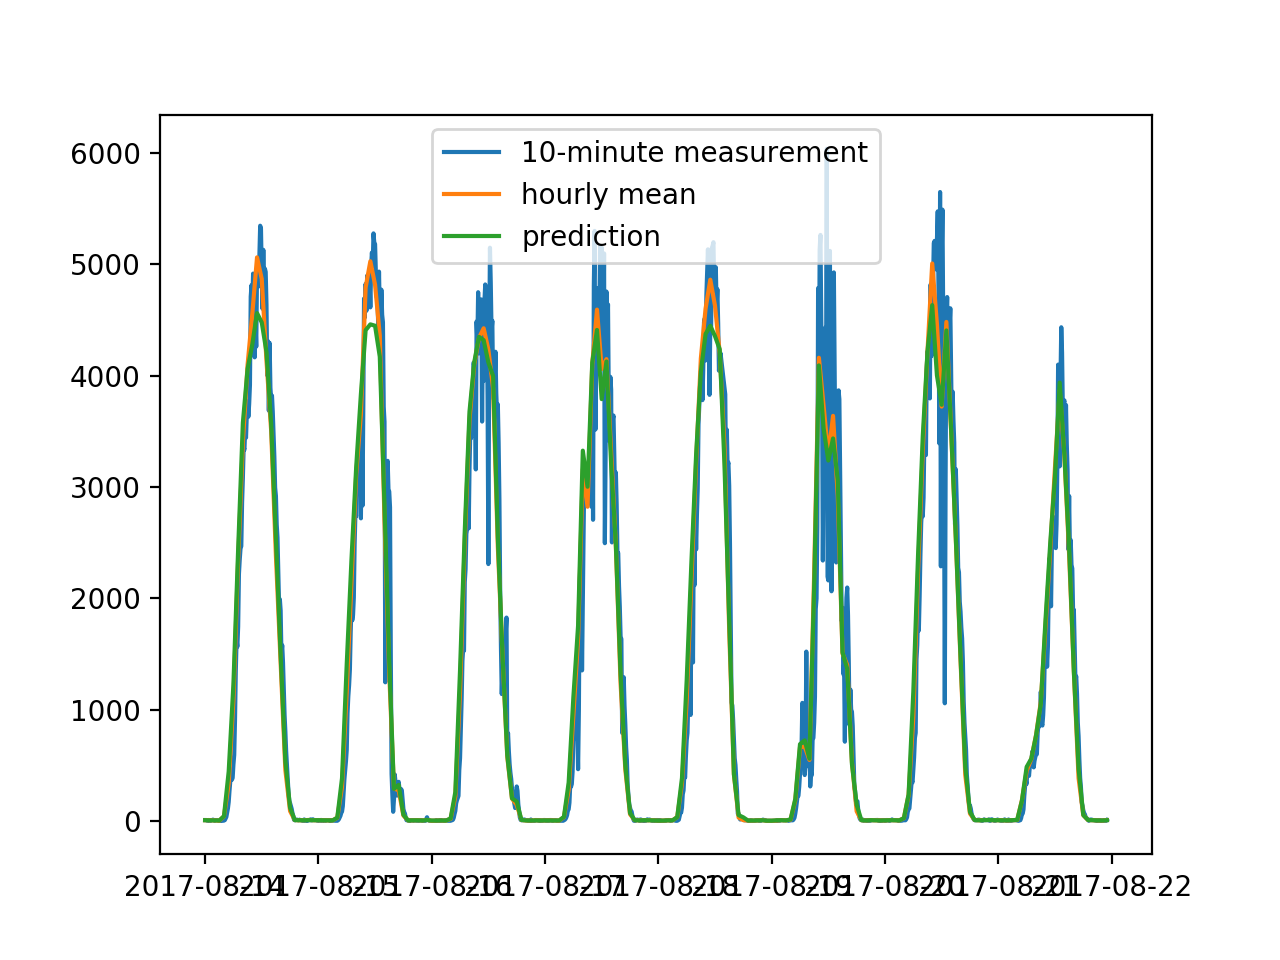

In [19]:
plt.figure()
plt.plot(ten_min_data, label = '10-minute measurement')
plt.plot(timestamps, predicted_weather.power_output_noisy.values, label = 'hourly mean')
plt.plot(timestamps, pred, label = 'prediction')
plt.legend()
plt.show()

## Further ML: Learn consumption patterns

## SPIELWIESE

In [28]:
all_data = pd.read_csv(os.path.join(path, 'data_hourly.csv'), index_col = 0)

In [29]:
all_data

,hour,DHI,GHI,precipitation,sunshine_dur,temp,apparent_zenith,azimuth,DNI,irradiance,power_output,PV_noise,power_output_noisy
date,,,,,,,,,,,,,
2016-01-01,0,1.000000,2.000000,0.0,0.0,3.916667,152.951337,29.192474,0.000000,1.041040,5.465458,0.406382,5.059076
2016-01-01,1,1.000000,2.000000,0.3,0.0,3.966667,146.269650,53.361376,0.000000,1.072969,5.633085,0.561472,5.071613
2016-01-01,2,1.000000,2.000000,0.0,0.0,3.850000,137.350008,70.597616,0.000000,1.100424,5.777224,0.332850,5.444374
2016-01-01,3,1.000000,2.000000,0.0,0.0,3.683333,127.499366,83.793372,0.000000,1.091607,5.730938,0.423924,5.307014
2016-01-01,4,1.166667,2.500000,0.0,0.0,3.533333,117.394984,94.980482,0.000000,1.216163,6.384854,0.445140,5.939714
2016-01-01,5,1.166667,2.333333,0.0,0.0,2.983333,107.445302,105.348875,0.000000,1.151621,6.046013,0.339696,5.706316
2016-01-01,6,1.166667,2.666667,0.0,0.0,1.683333,97.974301,115.649507,0.000000,1.156989,6.074191,0.791771,5.282420
2016-01-01,7,6.166667,7.666667,0.0,0.0,1.633333,89.103850,126.415593,47.088414,20.676908,108.553765,5.108833,103.444932
2016-01-01,8,32.333333,33.500000,0.0,0.0,1.600000,81.703985,138.040121,8.781663,35.415947,185.933720,17.448305,168.485415


In [30]:
all_data['timestamps'] = pd.to_datetime(all_data.index) + pd.to_timedelta(all_data.hour, unit = 'h')

In [31]:
all_data.set_index('timestamps', inplace = True)
all_data.drop(['hour', 'DHI', 'DNI', 'irradiance', 'power_output', 'PV_noise'], axis = 1, inplace = True)
all_data['power_output_noisy'] = all_data.power_output_noisy / 1000 

In [32]:
all_data.to_csv(os.path.join('../Smart_Home/Data', 'data_hourly.csv'))

In [33]:
all_data

,GHI,precipitation,sunshine_dur,temp,apparent_zenith,azimuth,power_output_noisy
timestamps,,,,,,,
2016-01-01 00:00:00,2.000000,0.0,0.0,3.916667,152.951337,29.192474,0.005059
2016-01-01 01:00:00,2.000000,0.3,0.0,3.966667,146.269650,53.361376,0.005072
2016-01-01 02:00:00,2.000000,0.0,0.0,3.850000,137.350008,70.597616,0.005444
2016-01-01 03:00:00,2.000000,0.0,0.0,3.683333,127.499366,83.793372,0.005307
2016-01-01 04:00:00,2.500000,0.0,0.0,3.533333,117.394984,94.980482,0.005940
2016-01-01 05:00:00,2.333333,0.0,0.0,2.983333,107.445302,105.348875,0.005706
2016-01-01 06:00:00,2.666667,0.0,0.0,1.683333,97.974301,115.649507,0.005282
2016-01-01 07:00:00,7.666667,0.0,0.0,1.633333,89.103850,126.415593,0.103445
2016-01-01 08:00:00,33.500000,0.0,0.0,1.600000,81.703985,138.040121,0.168485
